# Decision Tree with Iris Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
data = datasets.load_iris()
X = data.data
y = data.target
print('Classes to predict: ', data.target_names)

Classes to predict:  ['setosa' 'versicolor' 'virginica']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

### Model

In [5]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [6]:
y_pred =  clf.predict(X_test)

In [7]:
clf.score(X_train, y_train), metrics.accuracy_score(y_test, y_pred)

(1.0, 0.9736842105263158)

In [8]:
dict(zip(data.feature_names, clf.feature_importances_))

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.0366595272735057,
 'petal length (cm)': 0.31848915646737325,
 'petal width (cm)': 0.6448513162591211}

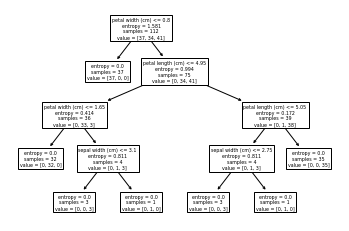

In [9]:
plot_tree(clf, feature_names=data.feature_names)
plt.show()

### Plot Accuracy with Depth

In [10]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

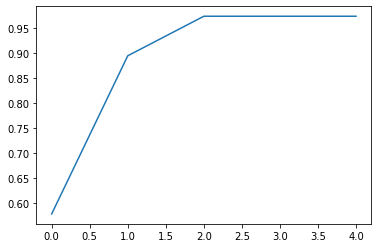

In [11]:
plt.plot(accuracy)
plt.show()